In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random

In [ ]:
df = pd.read_csv("insurance.txt",sep = ",")
df.drop(['children'],axis = 1,inplace = True)

PREPROCESSING

In [ ]:
df = df.sample(frac=1, random_state=400)
df = df.reset_index(drop = True)

In [ ]:
X = np.array(df.drop(['charges'], axis = 1))

In [ ]:
poly_features = []
for i in range(10):
  poly = PolynomialFeatures(i+1)
  data = poly.fit_transform(X)
  poly_features.append(np.array(data))

In [ ]:
def standardize(x,mean,std):
  return (x-mean)/std

In [ ]:
def preprocess(df):
  for i,col in enumerate(df.T):
      mean = col.mean()
      std = col.std()
      col = standardize(col,mean,std)
      df[:,i] = col
  df[:, 0] =  1    
  return df   

In [ ]:
for i in range(10):
  poly_features[i] = preprocess(poly_features[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
#standardizing target
mean_charges = df.mean()['charges']
charges_variance = df.std()['charges']
df['charges']  = df['charges'].apply(lambda x : standardize(x,mean_charges,charges_variance)) 
y = np.array((df['charges'])).reshape(len(df),1)

In [ ]:
train_size = int(0.7*len(df))
val_size = int(0.2*len(df))
y_train = y[:train_size]
y_val =  y[train_size:train_size+val_size]
y_test = y[train_size+val_size:]

FUNCTIONS

In [ ]:
def cost_function(w,X,y):
  return (np.sum((np.dot(X,w) - y)**2))/2

In [ ]:
def gradient_descent(w,X,y,alpha,printError,reg,lamda):
  error = []
  for i in range(10000):
    if printError == True:
      if i%1000 == 0:
        print(cost_function(w,X,y))
    if i%50 == 0:
      error.append(cost_function(w,X,y))
    A = X.transpose()
    B = X.dot(w) - y
    if reg == "noreg":
      dw = A.dot(B) 
    elif reg == "lasso":
      dw = A.dot(B) + lamda*np.sign(w)
      dw[0] = dw[0] - lamda*np.sign(w[0])
    elif reg == "ridge":
      dw = A.dot(B) + lamda*2*w
      dw[0] = dw[0] - lamda*2*w[0]
    w = w - (alpha*dw)/len(X)
  return w,error 

In [ ]:
def predict(parameters,X_test):
  return np.dot(X_test,parameters)

In [ ]:
def RMSE(y_true,y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).mean())

POLYNOMIAL REGRESSION WITHOUT REGULARIZATION



In [ ]:
weight_list_without_reg = []
train_errors = []
val_errors = []
test_errors = []
train_RMSE = []
val_RMSE = []
test_RMSE = []

for i in range(10):
  w = np.zeros((poly_features[i].shape[1],1))
  X_train = poly_features[i][:train_size]
  X_val = poly_features[i][train_size:train_size+val_size]
  X_test = poly_features[i][train_size + val_size:]
  print("POLYNOMIAL WITH DEGREE {}".format(i+1))
  print("Training error every 1000 iterations: ")
  weights,error = gradient_descent(w,X_train,y_train,0.01,printError = True,reg = "noreg",lamda = 0)
  train_errors.append(cost_function(weights,X_train,y_train))
  val_errors.append(cost_function(weights,X_val,y_val))
  test_errors.append(cost_function(weights,X_test,y_test))

  y_train_pred = predict(weights,X_train)
  y_val_pred = predict(weights,X_val)
  y_test_pred = predict(weights,X_test)

  train_RMSE.append(RMSE(y_train,y_train_pred))
  val_RMSE.append(RMSE(y_val,y_val_pred))
  test_RMSE.append(RMSE(y_test,y_test_pred))
  print("")
  weight_list_without_reg.append(weights)

POLYNOMIAL WITH DEGREE 1
Training error every 1000 iterations: 
468.9035010093503
419.26406218566456
419.26406210272177
419.2640621027218
419.2640621027218
419.2640621027218
419.2640621027218
419.2640621027218
419.2640621027218
419.2640621027218

POLYNOMIAL WITH DEGREE 2
Training error every 1000 iterations: 
468.9035010093503
417.873115865963
417.2009362700496
416.6597439318716
416.22033774722775
415.86113363865866
415.5658821285307
415.3221379263063
415.1202199917538
414.9524940428655

POLYNOMIAL WITH DEGREE 3
Training error every 1000 iterations: 
468.9035010093503
416.03139459959056
414.84418555668736
414.2711617126248
413.98448566463105
413.8377513516478
413.7608657578611
413.71917286177745
413.6952941869648
413.68046085486793

POLYNOMIAL WITH DEGREE 4
Training error every 1000 iterations: 
468.9035010093503
414.26628989219176
413.4742583036126
413.31083331017646
413.259813963711
413.2300175561651
413.20491456629645
413.1814495381792
413.1590144118611
413.137449482536

POLYNOMIAL 

In [ ]:
for i in range(10):
  print("For model with degree {}:".format(i+1))
  print("Train Sum of squares of error = {}".format(train_errors[i]))
  print("Validation Sum of squares of error = {}".format(val_errors[i]))
  print("test Sum of squares of error = {}".format(test_errors[i]))
  print("Train RMSE = {}".format(train_RMSE[i]))
  print("Validation RMSE = {}".format(val_RMSE[i]))
  print("test RMSE = {}".format(test_RMSE[i]))
  print(" ")

For model with degree 1:
Train Sum of squares of error = 419.2640621027218
Validation Sum of squares of error = 124.38730683792616
test Sum of squares of error = 46.88233760063521
Train RMSE = 0.9465005972324431
Validation RMSE = 0.9652668678281606
test RMSE = 0.8333985538978576
 
For model with degree 2:
Train Sum of squares of error = 414.8128691031874
Validation Sum of squares of error = 126.95138068353819
test Sum of squares of error = 49.33647018097834
Train RMSE = 0.9414628428188337
Validation RMSE = 0.9751649459382771
test RMSE = 0.8549331373550959
 
For model with degree 3:
Train Sum of squares of error = 413.6702353655027
Validation Sum of squares of error = 128.39530699375433
test Sum of squares of error = 51.55529309320786
Train RMSE = 0.9401652829837939
Validation RMSE = 0.9806949572645677
test RMSE = 0.8739462911983641
 
For model with degree 4:
Train Sum of squares of error = 413.1166802369856
Validation Sum of squares of error = 128.25507973120182
test Sum of squares of 

OVERFITTING VISUALIZATION

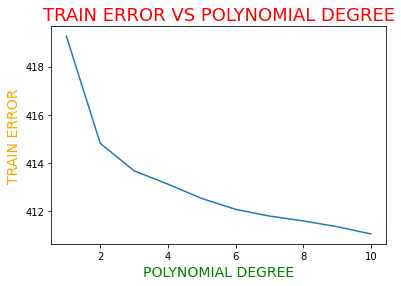

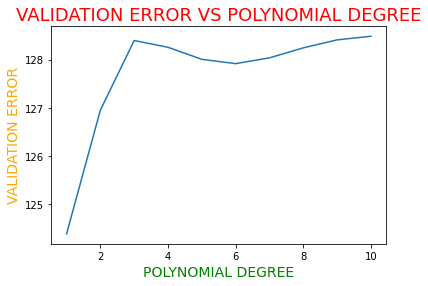

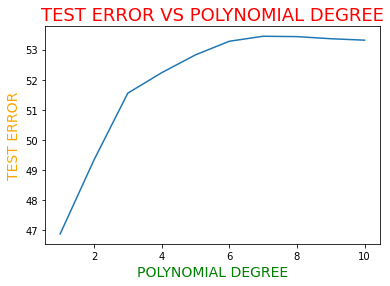

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.subplot()
plt.plot(x,train_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("TRAIN ERROR",color = 'orange',fontsize = 14)
plt.title("TRAIN ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()
plt.subplot()
plt.plot(x,val_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("VALIDATION ERROR",color = 'orange',fontsize = 14)
plt.title("VALIDATION ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()
plt.subplot()
plt.plot(x,test_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("TEST ERROR",color = 'orange',fontsize = 14)
plt.title("TEST ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()

HYPERPARAMETERS INITIALIZATION

In [ ]:
#random.seed(9)
#hyperparams = np.random.uniform(0,1,10)
#hyperparams.sort() to generate the below hyperparameters
hyperparams = [0.04427172, 0.08085184, 0.15858914, 0.15967957, 0.26061979,0.38222588, 0.39914724, 0.4466604 , 0.83815634, 0.96190113]

FINDING BEST HYPERPARAMTERS FOR LASSO REGULARIZATION

In [ ]:
optimal_hyperparams = []
for i in range(10):
  error_val = []
  for lam in hyperparams:
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    weights,error = gradient_descent(w,X_train,y_train,0.01,printError = False,reg = "lasso",lamda = lam)
    print("Validation error for degree {} and hyperparameter {} is {}".format(i+1,lam,cost_function(weights,X_val,y_val)))
    error_val.append(cost_function(weights,X_val,y_val))
    print("")
  error_val = np.array(error_val)  
  index = np.argmin(error_val)
  optimal_hyperparams.append(hyperparams[index])

Validation error for degree 1 and hyperparameter 0.04427172 is 124.38804585034293

Validation error for degree 1 and hyperparameter 0.08085184 is 124.38865720447254

Validation error for degree 1 and hyperparameter 0.15858914 is 124.38995861618598

Validation error for degree 1 and hyperparameter 0.15967957 is 124.38997689259587

Validation error for degree 1 and hyperparameter 0.26061979 is 124.39167128418207

Validation error for degree 1 and hyperparameter 0.38222588 is 124.39371929969283

Validation error for degree 1 and hyperparameter 0.39914724 is 124.39400486137481

Validation error for degree 1 and hyperparameter 0.4466604 is 124.39480744524475

Validation error for degree 1 and hyperparameter 0.83815634 is 124.40146323259594

Validation error for degree 1 and hyperparameter 0.96190113 is 124.4035828497365

Validation error for degree 2 and hyperparameter 0.04427172 is 126.9280144909237

Validation error for degree 2 and hyperparameter 0.08085184 is 126.90875689989241

Validat

POLYNOMIAL REGRESSION WITH LASSO REGULARIZATION
WITH OPTIMAL HYPERPARAMETERS

In [ ]:
weight_list_lasso = []
train_errors = []
val_errors = []
test_errors = []

for i in range(10):
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    X_test = poly_features[i][train_size + val_size:]
    print("Lasso regularization model with degree {} and lambda as {}".format(i+1,optimal_hyperparams[i]))
    print("Training error every 1000 iterations:")
    weights,error = gradient_descent(w,X_train,y_train,0.01,printError = True,reg = "lasso",lamda = optimal_hyperparams[i])

    train_errors.append(cost_function(weights,X_train,y_train))
    val_errors.append(cost_function(weights,X_val,y_val))
    test_errors.append(cost_function(weights,X_test,y_test))

    y_train_pred = predict(weights,X_train)
    y_val_pred = predict(weights,X_val)
    y_test_pred = predict(weights,X_test)
    print("")
    weight_list_lasso.append(weights) 

Lasso regularization model with degree 1 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
419.26406433098987
419.2640639714918
419.264063971483
419.264063971483
419.264063971483
419.264063971483
419.264063971483
419.264063971483
419.264063971483

Lasso regularization model with degree 2 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
417.8780407276331
417.2723543859992
416.7968462548912
416.4541928721944
416.17030594957157
415.9323956934577
415.7311368147811
415.5595718256443
415.41239761842803

Lasso regularization model with degree 3 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
416.1545110153769
415.0680963964327
414.5127808787794
414.2084259067475
414.03532780312094
413.9333390692783
413.8710260718144
413.83274160878955
413.80670852348715

Lasso regularization model with degree 4 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
414.43471494001324
413.6

In [ ]:
for i in range(10):
    print("FOR MODEL WITH DEGREE {} AND LAMBDA {}:".format(i+1,optimal_hyperparams[i]))
    print("Train Sum of squares of error = {}".format(train_errors[i]))
    print("Validation Sum of squares of error = {}".format(val_errors[i]))
    print("Test Sum of squares of error = {}".format(test_errors[i]))
    print(" ") 

FOR MODEL WITH DEGREE 1 AND LAMBDA 0.04427172:
Train Sum of squares of error = 419.264063971483
Validation Sum of squares of error = 124.38804585034293
Test Sum of squares of error = 46.88337760209099
 
FOR MODEL WITH DEGREE 2 AND LAMBDA 0.96190113:
Train Sum of squares of error = 415.28549004157287
Validation Sum of squares of error = 126.45880273739816
Test Sum of squares of error = 48.758487551064825
 
FOR MODEL WITH DEGREE 3 AND LAMBDA 0.96190113:
Train Sum of squares of error = 413.7875041978176
Validation Sum of squares of error = 127.85934512408012
Test Sum of squares of error = 51.01549353789224
 
FOR MODEL WITH DEGREE 4 AND LAMBDA 0.96190113:
Train Sum of squares of error = 413.2089861523027
Validation Sum of squares of error = 128.11432612089018
Test Sum of squares of error = 52.0794543459987
 
FOR MODEL WITH DEGREE 5 AND LAMBDA 0.26061979:
Train Sum of squares of error = 412.5948238235635
Validation Sum of squares of error = 127.95355210881806
Test Sum of squares of error = 

POLYNOMIAL REGRESSION WITH RIDGE REGULARIZATION

FINDING OPTIMAL HYPERPARAMETERS FOR RIDGE REGULARIZATION

In [ ]:
optimal_hyperparams = []
for i in range(10):
  error_val = []
  for lam in hyperparams:
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    weights,error = gradient_descent(w,X_train,y_train,0.01,printError = False,reg = "ridge",lamda = lam)
    print("Validation error for degree {} and hyperparameter {} is {}".format(i+1,lam,cost_function(weights,X_val,y_val)))
    error_val.append(cost_function(weights,X_val,y_val))
    print("")
  error_val = np.array(error_val)  
  index = np.argmin(error_val)
  optimal_hyperparams.append(hyperparams[index])

Validation error for degree 1 and hyperparameter 0.04427172 is 124.38751382538473

Validation error for degree 1 and hyperparameter 0.08085184 is 124.38768497704991

Validation error for degree 1 and hyperparameter 0.15858914 is 124.38804907219455

Validation error for degree 1 and hyperparameter 0.15967957 is 124.38805418303949

Validation error for degree 1 and hyperparameter 0.26061979 is 124.38852772568283

Validation error for degree 1 and hyperparameter 0.38222588 is 124.3890993627299

Validation error for degree 1 and hyperparameter 0.39914724 is 124.38917900443117

Validation error for degree 1 and hyperparameter 0.4466604 is 124.38940275802729

Validation error for degree 1 and hyperparameter 0.83815634 is 124.3912536676163

Validation error for degree 1 and hyperparameter 0.96190113 is 124.3918413854418

Validation error for degree 2 and hyperparameter 0.04427172 is 126.94164459875702

Validation error for degree 2 and hyperparameter 0.08085184 is 126.93365358486055

Validati

POLYNOMIAL REGRESSION WITH RIDGE REGULARIZATION
WITH OPTIMAL HYPERPARAMETERS

In [ ]:
weight_list_ridge = []
train_errors = []
val_errors = []
test_errors = []

for i in range(10):
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    X_test = poly_features[i][train_size + val_size:]
    print("Ridge regularization model with degree {} and lambda as {}".format(i+1,optimal_hyperparams[i]))
    print("Training error every 1000 iterations:")
    weights,error = gradient_descent(w,X_train,y_train,0.01,printError = True,reg = "ridge",lamda = optimal_hyperparams[i])

    train_errors.append(cost_function(weights,X_train,y_train))
    val_errors.append(cost_function(weights,X_val,y_val))
    test_errors.append(cost_function(weights,X_test,y_test))

    y_train_pred = predict(weights,X_train)
    y_val_pred = predict(weights,X_val)
    y_test_pred = predict(weights,X_test)

    print("")
    weight_list_ridge.append(weights) 

Ridge regularization model with degree 1 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
419.2640627716969
419.26406247160855
419.2640624715913
419.2640624715913
419.2640624715913
419.2640624715913
419.2640624715913
419.2640624715913
419.2640624715913

Ridge regularization model with degree 2 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
417.8810889766292
417.22726906234766
416.70915074959214
416.2941530609213
415.9587118758076
415.685458121878
415.4613633352187
415.27650080755893
415.1232029731452

Ridge regularization model with degree 3 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
416.051327737832
414.88681291735037
414.32518569527485
414.04065316631534
413.8907849597239
413.80858646136363
413.7612920217827
413.73247860773074
413.7137429904924

Ridge regularization model with degree 4 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
414.289581635252

In [ ]:
for i in range(10):
    print("FOR MODEL WITH DEGREE {} AND LAMBDA {}:".format(i+1,optimal_hyperparams[i]))
    print("Train Sum of squares of error = {}".format(train_errors[i]))
    print("Validation Sum of squares of error = {}".format(val_errors[i]))
    print("Test Sum of squares of error = {}".format(test_errors[i]))
    print(" ")

FOR MODEL WITH DEGREE 1 AND LAMBDA 0.04427172:
Train Sum of squares of error = 419.2640624715913
Validation Sum of squares of error = 124.38751382538473
Test Sum of squares of error = 46.88275438950511
 
FOR MODEL WITH DEGREE 2 AND LAMBDA 0.96190113:
Train Sum of squares of error = 414.99547729904634
Validation Sum of squares of error = 126.75493260250643
Test Sum of squares of error = 49.14210680275751
 
FOR MODEL WITH DEGREE 3 AND LAMBDA 0.96190113:
Train Sum of squares of error = 413.7006911781194
Validation Sum of squares of error = 128.20891944075902
Test Sum of squares of error = 51.31478448926672
 
FOR MODEL WITH DEGREE 4 AND LAMBDA 0.96190113:
Train Sum of squares of error = 413.1407015613187
Validation Sum of squares of error = 128.18552428952216
Test Sum of squares of error = 52.09603338457427
 
FOR MODEL WITH DEGREE 5 AND LAMBDA 0.96190113:
Train Sum of squares of error = 412.5572254720738
Validation Sum of squares of error = 127.98435195953248
Test Sum of squares of error =

WEIGHTS LIST FOR DEGREE 3 POLYNOMIAL

In [ ]:
print("For model of degree 3 and no regularization the weights are {}".format(weight_list_without_reg[2]))
print("For model of degree 3 and Lasso regularization the weights are {}".format(weight_list_lasso[2]))
print("For model of degree 3 and Ridge regularization the weights are {}".format(weight_list_ridge[2]))

For model of degree 3 and no regularization the weights are [[ 0.00220507]
 [-0.07007314]
 [ 0.35411148]
 [ 0.08054   ]
 [ 0.04889479]
 [ 0.09282873]
 [ 0.19872095]
 [ 0.07264676]
 [-0.06088694]
 [-0.31299626]]
For model of degree 3 and Lasso regularization the weights are [[ 2.11939819e-03]
 [-5.86363958e-03]
 [ 3.65104431e-01]
 [ 3.71180188e-02]
 [-4.35718498e-06]
 [ 2.22096834e-02]
 [ 2.14467762e-01]
 [ 3.65623373e-02]
 [ 8.41305012e-06]
 [-2.62868806e-01]]
For model of degree 3 and Ridge regularization the weights are [[ 0.00217135]
 [-0.06424174]
 [ 0.33842454]
 [ 0.07949064]
 [ 0.04806045]
 [ 0.08755805]
 [ 0.19292871]
 [ 0.07290263]
 [-0.05817627]
 [-0.29366107]]


SURFACE PLOTS

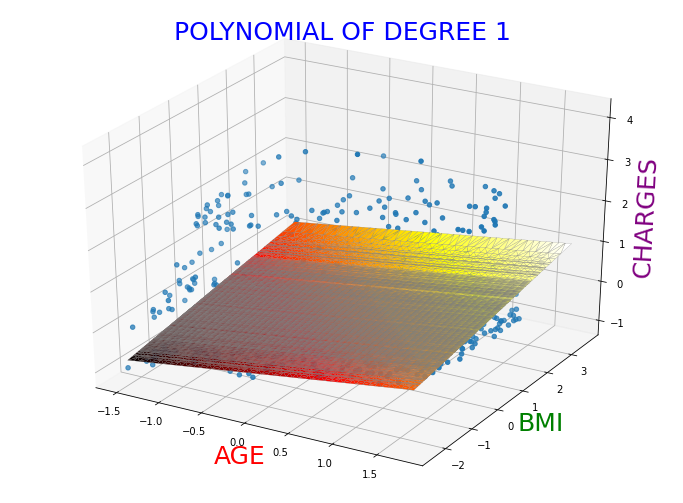

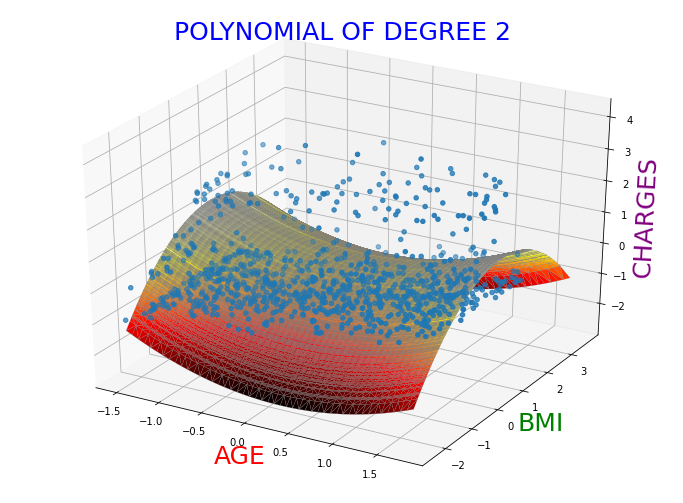

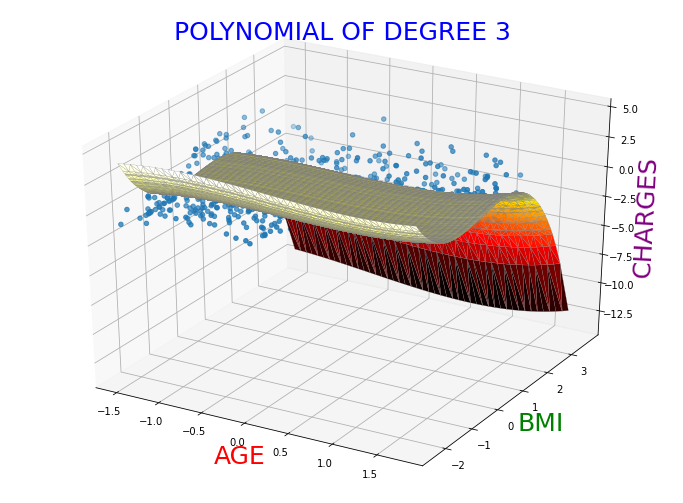

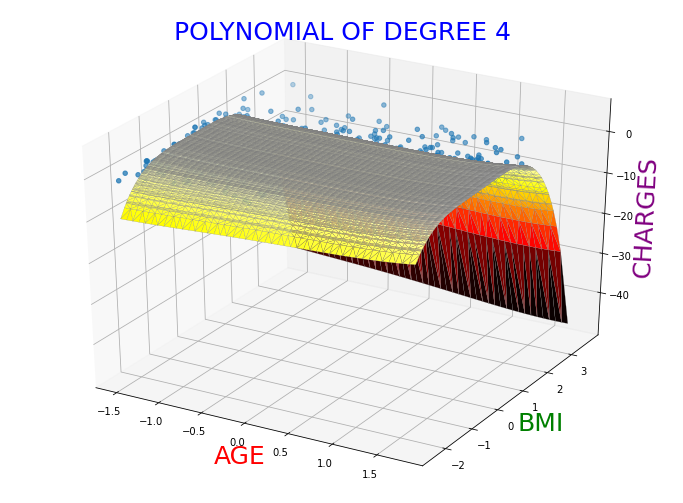

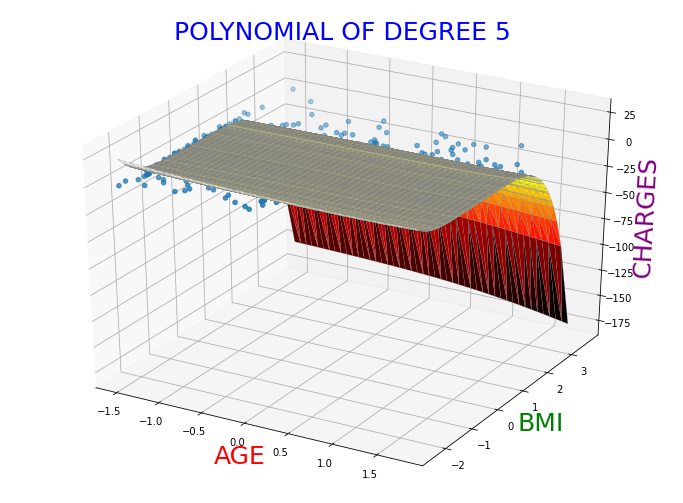

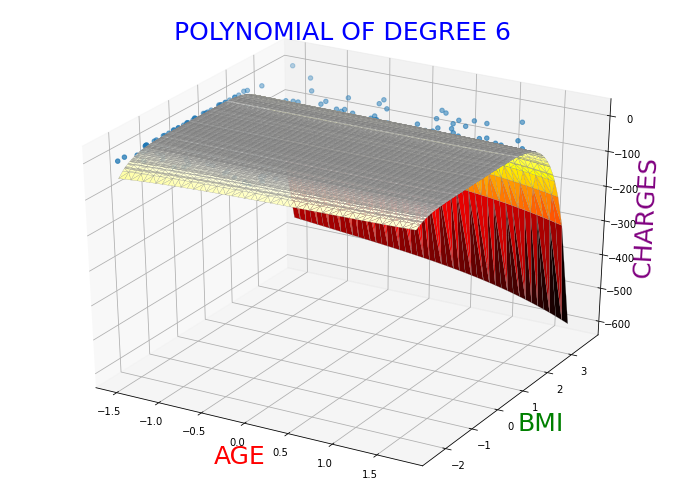

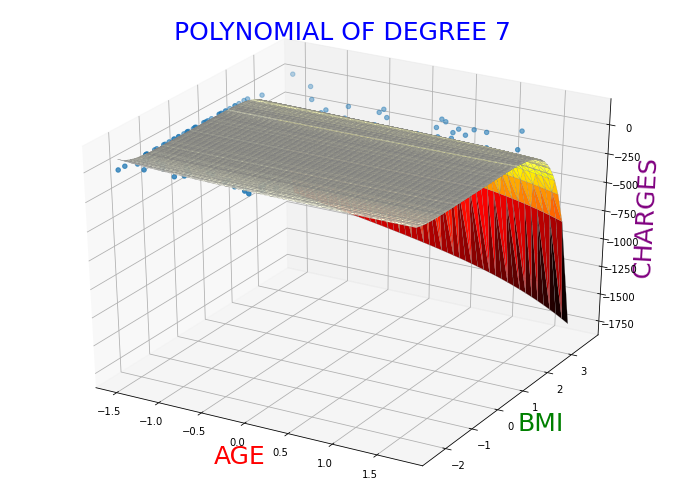

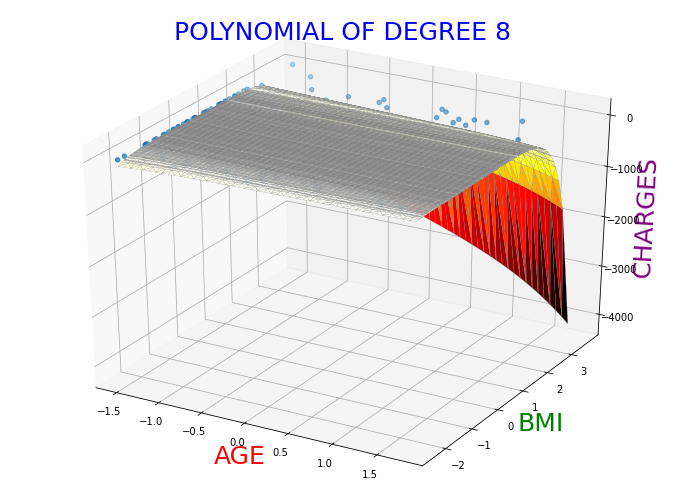

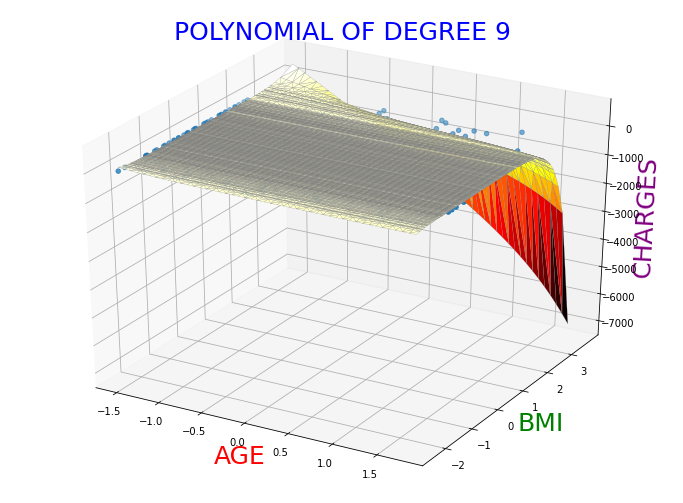

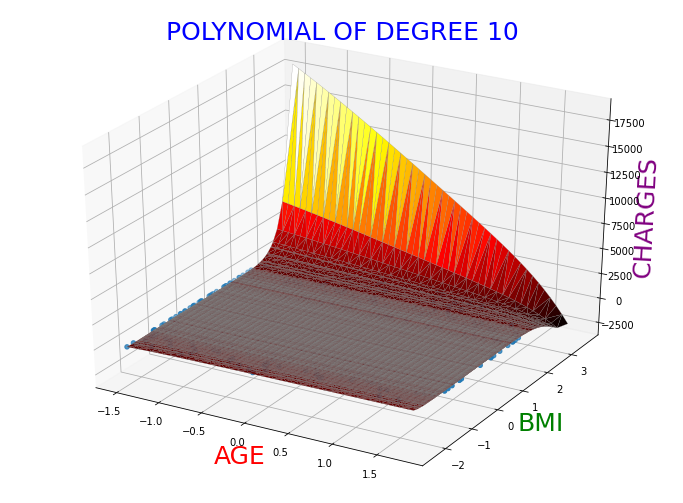

In [ ]:
for i in range(10):
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize=(12,9))
  ax = fig.add_subplot(111, projection='3d')
  X = X_train[:][:,1]
  Y = X_train[:][:,2]
  X, Y = np.meshgrid(X, Y)
  X = X.flatten()
  Y = Y.flatten()
  matr = np.array(np.vstack((X, Y)).T,dtype = 'float')
  poly = PolynomialFeatures(i+1)
  data = poly.fit_transform(matr)
  z = predict(weight_list_without_reg[i],data)
  ax.set_title('POLYNOMIAL OF DEGREE {}'.format(i+1),fontsize=25, color = "Blue")
  ax.set_xlabel('AGE', fontsize=25, color = "red",y=5)
  ax.set_ylabel('BMI',color = "green",fontsize = 25,y=5)
  ax.set_zlabel('CHARGES', fontsize=25,color = "Purple",y=5)
  my_cmap = plt.get_cmap('hot') 
  ax.scatter(X_train[:][:,1],X_train[:][:,2],y_train, zdir='z', s=20, c=None, depthshade=True,cmap = my_cmap)
  trisurf = ax.plot_trisurf(X, Y, z.flatten(), cmap = my_cmap,linewidth = 0.2,antialiased = True,edgecolor = 'grey') 
  plt.show()